# MLND Capstone Project
**Problem**<br>
We are going to analyse the data, which is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
<br>

The target is to develop a model which can predict Class of the wine based in 13 features.
<br>
Details of features:
<br>
The initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. 
<br>
1) Alcohol<br>
2) Malic acid<br>
3) Ash<br>
4) Alcalinity of ash<br>
5) Magnesium<br>
6) Total phenols<br>
7) Flavanoids<br>
8) Nonflavanoid phenols<br>
9) Proanthocyanins<br>
10)Color intensity<br>
11)Hue<br>
12)OD280/OD315 of diluted wines<br>
13)Proline<br>
<br>
In a classification context, this is a well posed problem with "well behaved" class structures.
<br>
Number of Instances<br>
      	class 1 59<br>
	class 2 71<br>
	class 3 48<br>
Number of Attributes <br>
	13 (All attributes are continuous)<br>

In [1]:
#Import all the required libraries
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

Load the wine data csv file which has 14 columns. First column is the class of the Wine and rest 13 are attributes.

In [2]:
url = 'wine_data.csv'
dataset = read_csv(url, header=None)

In [3]:
# Visualize Data
# Printing the shape
print(dataset.shape)

(178, 14)


In [4]:
#Data type of the attributes
set_option('display.max_rows', 100)
print(dataset.dtypes)

0       int64
1     float64
2     float64
3     float64
4     float64
5       int64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13      int64
dtype: object


In [5]:
# Printing the data head
set_option('display.width', 150)
print(dataset.head(20))

    0      1     2     3     4    5     6     7     8     9     10    11    12    13
0    1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92  1065
1    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40  1050
2    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17  1185
3    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45  1480
4    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   735
5    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85  1450
6    1  14.39  1.87  2.45  14.6   96  2.50  2.52  0.30  1.98  5.25  1.02  3.58  1290
7    1  14.06  2.15  2.61  17.6  121  2.60  2.51  0.31  1.25  5.05  1.06  3.58  1295
8    1  14.83  1.64  2.17  14.0   97  2.80  2.98  0.29  1.98  5.20  1.08  2.85  1045
9    1  13.86  1.35  2.27  16.0   98  2.98  3.15  0.22  1.85  7.22  1.01  3.55  1045
10   1  14.10  2.16  2.30  18.0  105  2.95  3.32  0.22  2.38  5.7

Data descriptions, precision to 2 places. Again, as we expect, the data has the same range, but interestingly differing mean values.
There may be some benefit from standardizing the data.

In [6]:
set_option('precision', 2)
print(dataset.describe())

           0       1       2       3       4       5       6       7       8       9       10      11      12       13
count  178.00  178.00  178.00  178.00  178.00  178.00  178.00  178.00  178.00  178.00  178.00  178.00  178.00   178.00
mean     1.94   13.00    2.34    2.37   19.49   99.74    2.30    2.03    0.36    1.59    5.06    0.96    2.61   746.89
std      0.78    0.81    1.12    0.27    3.34   14.28    0.63    1.00    0.12    0.57    2.32    0.23    0.71   314.91
min      1.00   11.03    0.74    1.36   10.60   70.00    0.98    0.34    0.13    0.41    1.28    0.48    1.27   278.00
25%      1.00   12.36    1.60    2.21   17.20   88.00    1.74    1.20    0.27    1.25    3.22    0.78    1.94   500.50
50%      2.00   13.05    1.87    2.36   19.50   98.00    2.35    2.13    0.34    1.56    4.69    0.96    2.78   673.50
75%      3.00   13.68    3.08    2.56   21.50  107.00    2.80    2.88    0.44    1.95    6.20    1.12    3.17   985.00
max      3.00   14.83    5.80    3.23   30.00  1

**Data Visualization**<br>
Histogram of features - Visualize the dataset with Histogram Plots.We can see that there are a lot of Gaussian-like distributions and perhaps some exponential-
like distributions for other attributes.

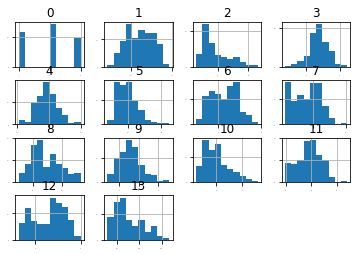

In [7]:
dataset.hist(sharex=False, sharey=False, layout=(4,4), xlabelsize=1, ylabelsize=1)
pyplot.show()

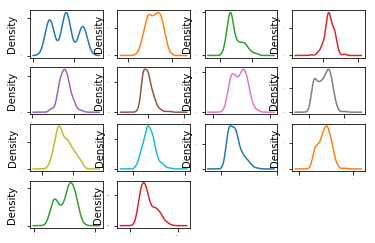

In [8]:
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
pyplot.show()

**Training-Validation Split** <br>It is a good idea to split the data into training and validation set. The training data will be used to train themodel and validation set will be used to validate the model accuracy. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [9]:
array = dataset.values
X = array[:,1:].astype(float)
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [10]:
num_folds = 7
seed = 7
scoring = 'accuracy'

**Spot Check** <br>
Spot-checking is a way of discovering which algorithms perform well on your machine learning
problem. We cannot know which algorithms are best suited to your problem beforehand. We
must trial a number of methods and focus attention on those that prove themselves the most
promising.
<br>

In [11]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.950680 (0.037812)
KNN: 0.718707 (0.071149)
DT: 0.908163 (0.049713)
NB: 0.978571 (0.024744)
SVM: 0.394218 (0.051332)


As per above result, Naive Bayes is performing best out of all the 5 algorithms. Logistic Regression and Decision Tree are also very close to NB.

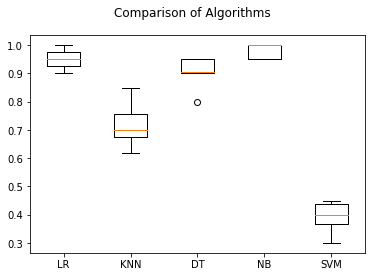

In [12]:
fig = pyplot.figure()
fig.suptitle('Comparison of Algorithms')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**Data Transformation** <br>
Applying standard scaler transformation and then checking the results again.<br>
First we will see what standard scaler does to data then we will transform the data to be used for algorithms

In [29]:
import pandas as pd
Xtraindf = pd.DataFrame(X_train)
Xtraindf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0
1,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
2,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0
3,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
4,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0


In [30]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaleddf = pd.DataFrame(rescaledX)
rescaleddf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.11,0.99,-0.06,-0.27,0.40,-1.42,-1.35,0.32,-1.13,0.07,-1.27,-1.24,-0.30
1,0.83,2.94,0.30,0.32,-0.37,-0.97,-1.44,1.27,-0.92,1.17,-1.45,-1.25,-0.10
2,1.34,-0.76,-0.16,-0.77,-0.37,-0.17,0.36,-0.80,-0.04,-0.06,0.94,0.29,1.56
3,0.66,0.21,1.15,1.49,0.33,-1.18,-1.21,0.24,-0.09,1.61,-1.00,-1.17,-0.07
4,0.31,-0.55,-0.80,-0.71,-0.44,0.14,0.13,-0.72,-0.42,-0.53,0.26,0.22,1.57


In [13]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.992857 (0.017496)
ScaledKNN: 0.957823 (0.040740)
ScaledDT: 0.922789 (0.044577)
ScaledNB: 0.978571 (0.024744)
ScaledSVM: 0.971769 (0.024461)


**Result After Data Transoformation**<br>
Logistic Regression comes out as winner after data transformation and SVM is very close. We will use these two algorithms and tume the parameters to get best result out of it.

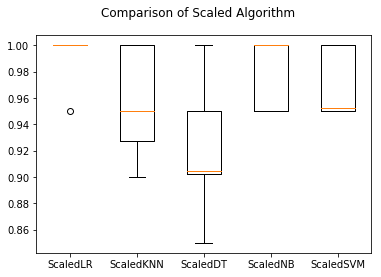

In [14]:
fig = pyplot.figure()
fig.suptitle('Comparison of Scaled Algorithm')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**Parameter Tuning- LR**<br>
Parameter Tuning of Logistic Regression using Grid Search. Optimizing Solver out of ('lbfgs','newton-cg', 'sag') and C out of (0.01, 0.1, 1.0, 20.0, 500.0).

In [15]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'solver': ['lbfgs','newton-cg', 'sag'],
              'C': [0.01, 0.1, 1.0, 20.0, 500.0]}
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

D:\Anc\envs\carnd-term1\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anc\envs\carnd-term1\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anc\envs\carnd-term1\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anc\envs\carnd-term1\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anc\envs\carnd-term1\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

Best: 0.992958 using {'solver': 'lbfgs', 'C': 1.0}
0.971831 (0.036089) with: {'solver': 'lbfgs', 'C': 0.01}
0.971831 (0.036089) with: {'solver': 'newton-cg', 'C': 0.01}
0.971831 (0.036089) with: {'solver': 'sag', 'C': 0.01}
0.978873 (0.024356) with: {'solver': 'lbfgs', 'C': 0.1}
0.978873 (0.024356) with: {'solver': 'newton-cg', 'C': 0.1}
0.978873 (0.024356) with: {'solver': 'sag', 'C': 0.1}
0.992958 (0.017393) with: {'solver': 'lbfgs', 'C': 1.0}
0.992958 (0.017393) with: {'solver': 'newton-cg', 'C': 1.0}
0.992958 (0.017393) with: {'solver': 'sag', 'C': 1.0}
0.985915 (0.022491) with: {'solver': 'lbfgs', 'C': 20.0}
0.985915 (0.022491) with: {'solver': 'newton-cg', 'C': 20.0}
0.985915 (0.022491) with: {'solver': 'sag', 'C': 20.0}
0.978873 (0.024698) with: {'solver': 'lbfgs', 'C': 500.0}
0.978873 (0.024698) with: {'solver': 'newton-cg', 'C': 500.0}
0.985915 (0.022491) with: {'solver': 'sag', 'C': 500.0}


D:\Anc\envs\carnd-term1\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anc\envs\carnd-term1\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anc\envs\carnd-term1\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anc\envs\carnd-term1\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anc\envs\carnd-term1\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

**LR Tuning Result**<br>
Logistics Regression is giving accuracy of 0.992958 using {'solver': 'lbfgs', 'C': 1.0}<br>
<br>
<br>
**Parameter Tuning - SVM**<br>
Parameter Tuning of SVM using Grid Search. Optimizing c_values out of (0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0) and kernel_values ot of ('linear', 'poly', 'rbf', 'sigmoid')

In [16]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.992958 using {'C': 0.1, 'kernel': 'linear'}
0.992958 (0.017393) with: {'C': 0.1, 'kernel': 'linear'}
0.802817 (0.079520) with: {'C': 0.1, 'kernel': 'poly'}
0.964789 (0.034028) with: {'C': 0.1, 'kernel': 'rbf'}
0.971831 (0.024458) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.957746 (0.017140) with: {'C': 0.3, 'kernel': 'linear'}
0.894366 (0.049394) with: {'C': 0.3, 'kernel': 'poly'}
0.971831 (0.024458) with: {'C': 0.3, 'kernel': 'rbf'}
0.985915 (0.022115) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.964789 (0.022449) with: {'C': 0.5, 'kernel': 'linear'}
0.929577 (0.035278) with: {'C': 0.5, 'kernel': 'poly'}
0.971831 (0.024458) with: {'C': 0.5, 'kernel': 'rbf'}
0.985915 (0.022115) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.971831 (0.024458) with: {'C': 0.7, 'kernel': 'linear'}
0.957746 (0.031591) with: {'C': 0.7, 'kernel': 'poly'}
0.971831 (0.024458) with: {'C': 0.7, 'kernel': 'rbf'}
0.985915 (0.022115) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.978873 (0.024356) with: {'C': 0.9, 'kernel': 'line

**SVM Tuning Result**<br>
SVM is giving accuracy of 0.992958 using {'C': 0.1, 'kernel': 'linear'}
<br>
<br>
**Ensembles**<br>
Trying AdaBoost, GradientBoosting, RandomForest and ExtraTrees ensembles to check if we can achieve better accuracy.

In [17]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.929252 (0.059158)
GBM: 0.964626 (0.034864)
RF: 0.985714 (0.022588)
ET: 0.957483 (0.056206)


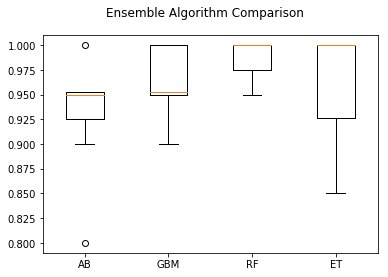

In [31]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**Data Transformation and Tuning** <br>
Applying standard scaler transformation and then Tuning GradientBoosting classifier.

In [19]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12]
                        ,"min_samples_split" :[2,3,4,5,6]
                        ,"n_estimators" : [10]
                        ,"min_samples_leaf": [1,2,3,4,5]
                        ,"max_features": (2,3,4)}
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'n_estimators': 10, 'min_samples_split': 6, 'max_features': 3, 'min_samples_leaf': 1, 'max_depth': 3}
0.978873 (0.024356) with: {'n_estimators': 10, 'min_samples_split': 2, 'max_features': 2, 'min_samples_leaf': 1, 'max_depth': 2}
0.978873 (0.024010) with: {'n_estimators': 10, 'min_samples_split': 3, 'max_features': 2, 'min_samples_leaf': 1, 'max_depth': 2}
0.978873 (0.036020) with: {'n_estimators': 10, 'min_samples_split': 4, 'max_features': 2, 'min_samples_leaf': 1, 'max_depth': 2}
0.985915 (0.022115) with: {'n_estimators': 10, 'min_samples_split': 5, 'max_features': 2, 'min_samples_leaf': 1, 'max_depth': 2}
0.978873 (0.024356) with: {'n_estimators': 10, 'min_samples_split': 6, 'max_features': 2, 'min_samples_leaf': 1, 'max_depth': 2}
0.964789 (0.034759) with: {'n_estimators': 10, 'min_samples_split': 2, 'max_features': 2, 'min_samples_leaf': 2, 'max_depth': 2}
0.978873 (0.024356) with: {'n_estimators': 10, 'min_samples_split': 3, 'max_features': 2, 'min_samples

# Finalize Model <br>
From the above result Gradient Boosting ensemble is performing best out of all the algorith so We will be using it for our final model

In [21]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(n_estimators=10, max_depth= 3, min_samples_split= 5, min_samples_leaf= 1, max_features= 4)
#(n_estimators=10, max_depth= 3, min_samples_split= 5, min_samples_leaf= 1, max_features= 4)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[ 7  0  0]
 [ 0 17  0]
 [ 0  0 12]]
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00         7
        2.0       1.00      1.00      1.00        17
        3.0       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        36



The result appears to be really good with 100% accuracy and it betters our benchmark model as well.<br><br>
**Improvements**
It would be better if we have all the attributes of the lab test result which would give us more robust model and better tool for predicting wine class. And more data points would also make this model more general and ready to use.

**Feature Imporatance**<br>
Checking importances of all the features.

In [58]:
import numpy as np
feature_name = {0:'Alcohol',1:'Malic acid',2:'Ash',3:'Alcalinity of ash',4:'Magnesium',5:'Total phenols',6:'Flavanoids',7:'Nonflavanoid phenols',8:'Proanthocyanins',9:'Colour intensity',10:'Hue',11:'OD280/OD315 of diluted wines',12:'Proline'}
X_traindf = pd.DataFrame(X_train)
print("Most imp feature = {}".format(feature_name[X_traindf.columns[np.argmax(model.feature_importances_)]]))
print("Least imp feature = {}".format(feature_name[X_traindf.columns[np.argmin(model.feature_importances_)]]))

# Get the indices based on feature importance in ascending order 
feature_ind = np.argsort(model.feature_importances_)

print("\n3 most imp features of the model: ")
# Reverse the array to get important features at the beginning
for index in feature_ind[::-1][:3]:
    print(feature_name[X_traindf.columns[index]])
    
print("\n3 least imp features of the model: ")
for index in feature_ind[:3]:
    print(feature_name[X_traindf.columns[index]])

Most imp feature = Proline
Least imp feature = Nonflavanoid phenols

3 most imp features of the model: 
Proline
Colour intensity
Hue

3 least imp features of the model: 
Nonflavanoid phenols
Alcalinity of ash
Ash


In [54]:
print(feature_ind)
imp_features = []
for i in feature_ind:
    imp_features.append(feature_name[i])
print(imp_features)

[ 7  3  2  1  8  4  5 11  0  6 10  9 12]
['Nonflavanoid phenols', 'Alcalinity of ash', 'Ash', 'Malic acid', 'Proanthocyanins', 'Magnesium', 'Total phenols', 'OD280/OD315 of diluted wines', 'Alcohol', 'Flavanoids', 'Hue', 'Colour intensity', 'Proline']


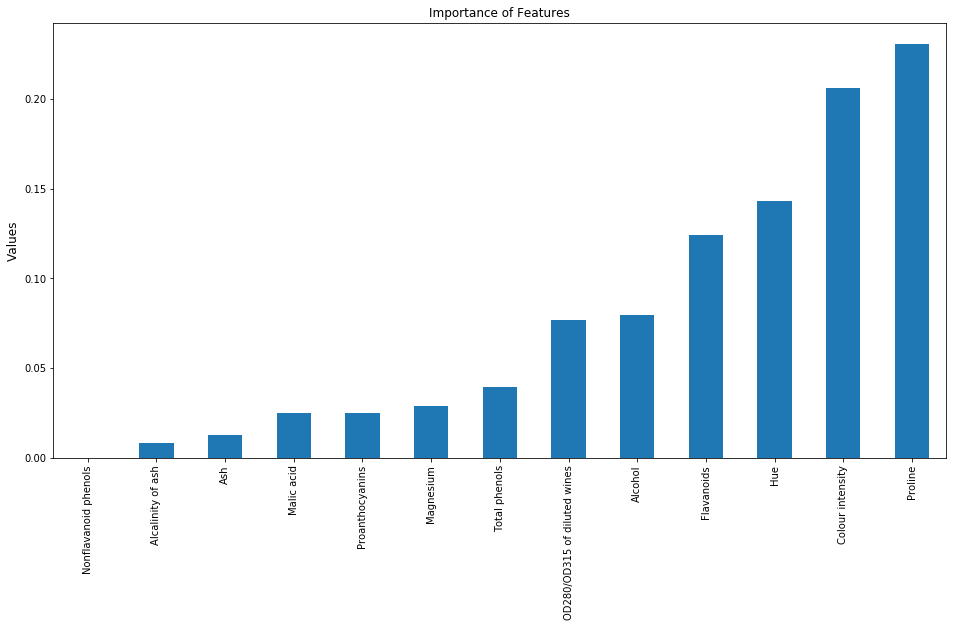

In [56]:
#plot

fi = pd.DataFrame(index=imp_features, data=np.sort(model.feature_importances_))

ax = fi.plot(kind="bar", title="Importance of Features", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()